<a href="https://colab.research.google.com/github/AliRizvi14/CE888/blob/master/bank_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
import matplotlib as mt
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score,StratifiedKFold
from sklearn.metrics import make_scorer, confusion_matrix, balanced_accuracy_score
from sklearn.metrics import f1_score as f1
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score ,classification_report
from collections import Counter
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.datasets import load_iris
from imblearn.datasets import make_imbalance

In [23]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/AliRizvi14/CE888_workspace/main/bank.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [8]:
imbalance=len(df[df['deposit'] == 'yes'])/len(df)*100
imbalance

47.38398136534671

In [9]:
outcomesLabelEncoder = LabelEncoder()
df['deposit']=outcomesLabelEncoder.fit_transform(df['deposit'])
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,0
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,0
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,0
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,0


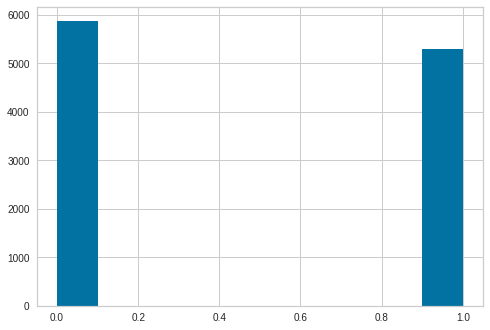

In [10]:
df['deposit'].hist()

In [11]:
df=pd.get_dummies(df)
df

,age,balance,day,duration,campaign,pdays,previous,deposit,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,2343,5,1042,1,-1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
1,56,45,5,1467,1,-1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
2,41,1270,5,1389,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
3,55,2476,5,579,1,-1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,54,184,5,673,2,-1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
11158,39,733,16,83,4,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
11159,32,29,19,156,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
11160,43,0,8,9,2,172,5,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [12]:
y=df['deposit'].copy()
x=df.drop(['deposit'],axis=1)
print(f'Distribution before imbalancing: {Counter(y)}')


Distribution before imbalancing: Counter({0: 5873, 1: 5289})


In [13]:
X_b, y_b = make_imbalance(x, y,                                         # Low Imbalance (65%)
                              sampling_strategy={0: 5873, 1: 3162},
                              random_state=42)
print(f'Distribution after imbalancing: {Counter(y_b)}')

Distribution after imbalancing: Counter({0: 5873, 1: 3162})


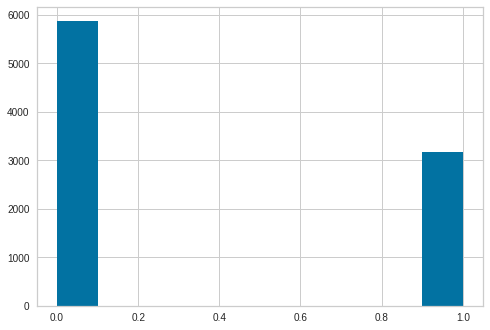

In [14]:
y_b.hist()     # 65 percentage og Imbalance

In [30]:
x_b1, y_b1 = make_imbalance(x, y,                                         # Low Imbalance (75%)
                              sampling_strategy={0: 5873, 1: 1957},
                              random_state=42)
print(f'Distribution after imbalancing: {Counter(y_b1)}')

Distribution after imbalancing: Counter({0: 5873, 1: 1957})


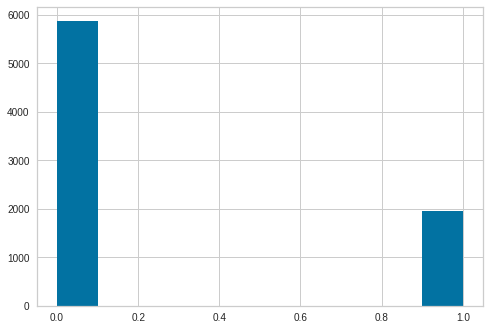

In [16]:
y_b1.hist()     # 75 percentage og Imbalance

In [31]:
x_b2, y_b2 = make_imbalance(x, y,                                         # Low Imbalance (90%)
                              sampling_strategy={0: 5873, 1: 652},
                              random_state=42)
print(f'Distribution after imbalancing: {Counter(y_b2)}')

Distribution after imbalancing: Counter({0: 5873, 1: 652})


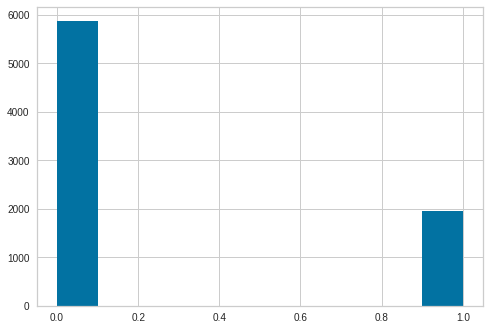

In [18]:
y_b1.hist()     # 90 percentage og Imbalance

In [26]:
def metric_score(x ,y):

  model=RandomForestClassifier()                                          # baseline classifier 
  metric=[]                                                                     # array to store measured metric 
  skf=StratifiedKFold(n_splits=10,random_state=None)                            # stratified cross validation is applied 
  skf.get_n_splits(x,y)

  for train_index,test_index in skf.split(x,y):

    
    x_train,x_test=x.iloc[train_index],x.iloc[test_index]                     # 4 surrogates of data are created training and test data 
    y_train,y_test=y.iloc[train_index],y.iloc[test_index]
    
    model.fit(x_train,y_train)                                            # model is fitted with training data 
    predict=model.predict(x_test)                                            # model is tested on test data 
    my_score=f1_score(predict,y_test)
    metric.append(my_score)                                                        # scores obtained for 10 iterations are stored in a array 
  result=pd.DataFrame(classification_report(y_test, predict, output_dict=True))
  display(result)


In [27]:
metric_score(x,y)

,0,1,accuracy,macro avg,weighted avg
precision,0.891344,0.818499,0.853943,0.854922,0.856880
recall,0.823129,0.888258,0.853943,0.855693,0.853943
f1-score,0.855880,0.851953,0.853943,0.853916,0.854022
support,588.000000,528.000000,0.853943,1116.000000,1116.000000


In [28]:
metric_score(x_b,y_b)

,0,1,accuracy,macro avg,weighted avg
precision,0.887454,0.813589,0.849462,0.850521,0.852507
recall,0.818027,0.884470,0.849462,0.851248,0.849462
f1-score,0.851327,0.847550,0.849462,0.849439,0.849540
support,588.000000,528.000000,0.849462,1116.000000,1116.000000


In [34]:
metric_score(x_b1,y_b1)

,0,1,accuracy,macro avg,weighted avg
precision,0.892562,0.735955,0.85696,0.814259,0.853360
recall,0.919932,0.668367,0.85696,0.794150,0.856960
f1-score,0.906040,0.700535,0.85696,0.803288,0.854598
support,587.000000,196.000000,0.85696,783.000000,783.000000


In [33]:
metric_score(x_b2,y_b2)

,0,1,accuracy,macro avg,weighted avg
precision,0.925159,0.750000,0.918712,0.837580,0.907697
recall,0.989779,0.276923,0.918712,0.633351,0.918712
f1-score,0.956379,0.404494,0.918712,0.680436,0.901359
support,587.000000,65.000000,0.918712,652.000000,652.000000


In [ ]:
def elbow(xlabel,ylabel):
  print("Identify number of cluster" )
  plt.xlabel('K')
  plt.title('Elbow Method')
  plt.ylabel('Inertias')
  plt.plot(xlabel,ylabel)

In [ ]:
def elbow_silhouette(x):  
  model = KMeans()
  visualizer = KElbowVisualizer(model, k=(2,12), scoring='silhouette', timings=True)

  visualizer.fit(x)        # Fit the data to the visualizer
  visualizer.show()
  viz = SilhouetteVisualizer(model, colors='yellowbrick')
  viz.fit(x)        # Fit the data to the visualizer
  viz.show()        # Finalize and render the figure

  return visualizer.elbow_value_